In [1]:
require(rstan)
require(plyr)
require(ggplot2)
require(reshape2)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.15.1, packaged: 2017-04-19 05:03:57 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: plyr
Loading required package: reshape2


In [2]:
x <- round(seq(-5, 5, 0.2),1)
N <- length(x)
eta_sq=1
rho_sq=0.5
sigma_sq=0.0001

In [3]:
x

[1] -5.0 -4.8 -4.6 -4.4 -4.2 -4.0 -3.8 -3.6 -3.4 -3.2 -3.0 -2.8 -2.6 -2.4 -2.2
[16] -2.0 -1.8 -1.6 -1.4 -1.2 -1.0 -0.8 -0.6 -0.4 -0.2  0.0  0.2  0.4  0.6  0.8
[31]  1.0  1.2  1.4  1.6  1.8  2.0  2.2  2.4  2.6  2.8  3.0  3.2  3.4  3.6  3.8
[46]  4.0  4.2  4.4  4.6  4.8  5.0

In [4]:
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

In [5]:
stanfit <- stan("MTH225_Spring2017/Gaussian_process1.stan",chains=3,iter=200)
pd <- extract(stanfit)
str(pd)

In file included from /usr/lib64/R/library/RcppEigen/include/Eigen/Core:276:0,
                 from /usr/lib64/R/library/RcppEigen/include/Eigen/Dense:1,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math/rev/core.hpp:14,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math/rev/mat.hpp:4,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math.hpp:4,
                 from /usr/lib64/R/library/StanHeaders/include/src/stan/model/model_header.hpp:4,
                 from file526822cc145e.cpp:8:
/usr/lib64/R/library/RcppEigen/include/Eigen/src/Core/Functors.h:973:28: warning: ‘template<class _Operation> class std::binder2nd’ is 

Warning message:
“There were 239 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

List of 2
 $ y   : num [1:300, 1:51] 0.0733 0.4417 -1.7709 -0.9278 0.7919 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ iterations: NULL
  .. ..$           : NULL
 $ lp__: num [1:300(1d)] -20.9 -19.3 -21.7 -22.8 -29.8 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL


In [6]:
print(get_stanmodel(stanfit))

S4 class stanmodel 'Gaussian_process1' coded as follows:
//Gaussian process
data {
    int<lower=1> N;
    real x[N];
    real eta_sq;
    real rho_sq;
    real sigma_sq;
}
transformed data {
    vector[N] mu;
    cov_matrix[N] Sigma;
    for (i in 1:N) 
        mu[i] = 0;
    for (i in 1:N) 
        for (j in 1:N)
            Sigma[i,j] = eta_sq * exp(-rho_sq*pow(x[i] - x[j],2)) + if_else(i==j, sigma_sq, 0.0);
}
parameters {
    vector[N] y;
}
model {
    y ~ multi_normal(mu,Sigma);
} 


In [7]:
print(stanfit)

Inference for Stan model: Gaussian_process1.
3 chains, each with iter=200; warmup=100; thin=1; 
post-warmup draws per chain=100, total post-warmup draws=300.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
y[1]   -0.02    0.06 1.04  -1.97  -0.76  -0.06   0.70   1.96   297 1.01
y[2]    0.00    0.06 1.02  -1.94  -0.72   0.00   0.67   1.81   259 1.01
y[3]    0.01    0.07 1.00  -2.03  -0.68   0.04   0.69   1.88   210 1.01
y[4]    0.03    0.08 0.99  -1.92  -0.58   0.02   0.67   1.79   171 1.01
y[5]    0.04    0.08 0.97  -1.99  -0.51   0.02   0.71   1.87   145 1.02
y[6]    0.05    0.08 0.97  -2.09  -0.50   0.03   0.69   1.94   130 1.02
y[7]    0.05    0.09 0.96  -2.05  -0.50   0.05   0.63   2.00   123 1.02
y[8]    0.06    0.09 0.96  -1.94  -0.51   0.04   0.67   1.92   119 1.02
y[9]    0.06    0.09 0.96  -1.97  -0.54   0.06   0.69   1.95   119 1.02
y[10]   0.06    0.09 0.96  -1.80  -0.57   0.06   0.69   1.94   122 1.02
y[11]   0.06    0.09 0.97  -1.75  -0.63   0.02   

Using X1 as id variables


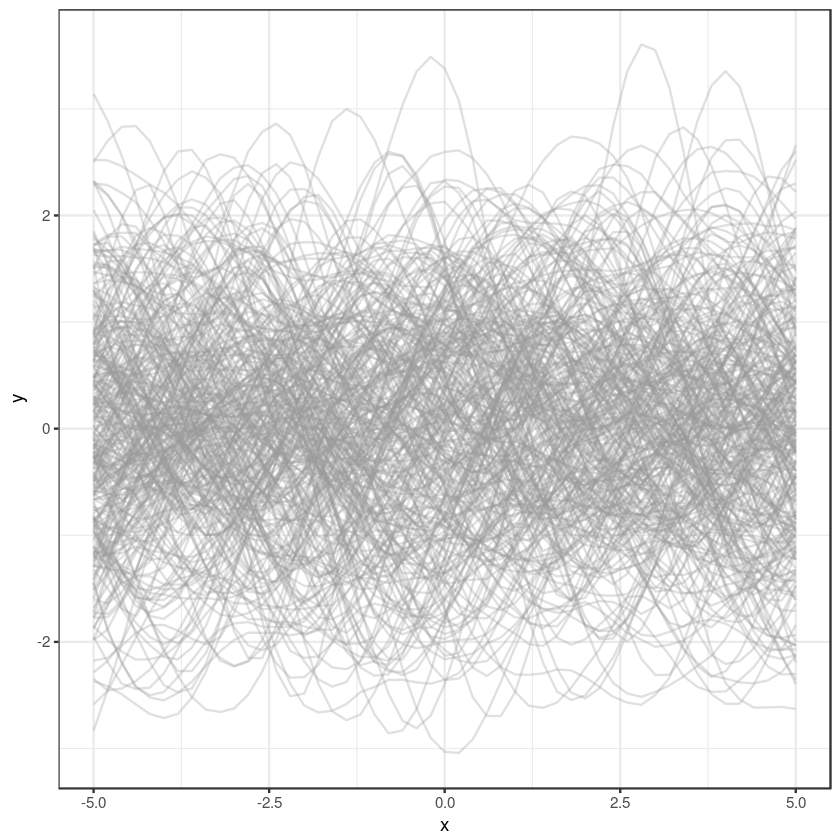

In [8]:
data <- adply(pd$y, 2)
tmp <- melt(data)
names(tmp) <- c("xid", "group", "y")
tmp <- mutate(tmp, x=x[xid])
fig2a <- ggplot(tmp, aes(x=x, y=y)) +
    geom_line(aes(group=group), colour="#999999", alpha=0.3) + theme_bw()
fig2a